In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_file_path = "PCB.dt"
x_values = []
y_values = []

with open(data_file_path) as file:
    for line in file:
        parts = line.split()
        if len(parts) == 2:
            x_values.append(parts[0])
            y_values.append(parts[1])

x_values = np.array(x_values, dtype=np.float64)
y_values = np.array(y_values, dtype=np.float64)

In [3]:
class LinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        """
        Fit the linear regression model to the input data using the pseudoinverse method.

        Param: X (numpy.ndarray): Input features (independent variables).
        Param: y (numpy.ndarray): Target values (dependent variable).
        """
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)

        #Add a column of ones to the input features to represent the intercept term
        X = np.column_stack((np.ones_like(X), X))

        #Calculates the coefficients using the pseudoinverse
        self.coefficients = np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X)),X.T),y)

    def predict(self, X):
        """
        Make predictions using the fitted linear regression model.

        Param: X (numpy.ndarray): Input features (independent variables) for prediction.

        Returns: numpy.ndarray: Predicted values.
        """
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)

        # Add a column of ones to the input features to represent the intercept term
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        # Calculate predictions
        y_pred = np.dot(X, self.coefficients)
        return y_pred

In [4]:
model = LinearRegression()
y_values_transformed = np.log(y_values)
model.fit(x_values, y_values_transformed)
a = model.coefficients[0]
b = model.coefficients[1]
print(f"Parameters a: {a} and b: {b}")

Parameters a: 0.03147246971449147 and b: 0.2591282395640697


In [5]:
def h(x, a, b):
    return np.exp(a*x+b)

In [6]:
y_pred = h(x_values, a, b)
y_pred

array([1.33723053, 1.56512088, 1.33723053, 1.56512088, 1.33723053,
       1.56512088, 1.33723053, 1.61516243, 1.37998576, 1.61516243,
       1.37998576, 1.61516243, 1.37998576, 1.66680396, 1.42410799,
       1.66680396, 1.42410799, 1.66680396, 1.42410799, 1.72009663,
       1.46964095, 1.83184821, 1.46964095, 1.89041783, 1.46964095,
       1.89041783, 1.51662973, 1.89041783])

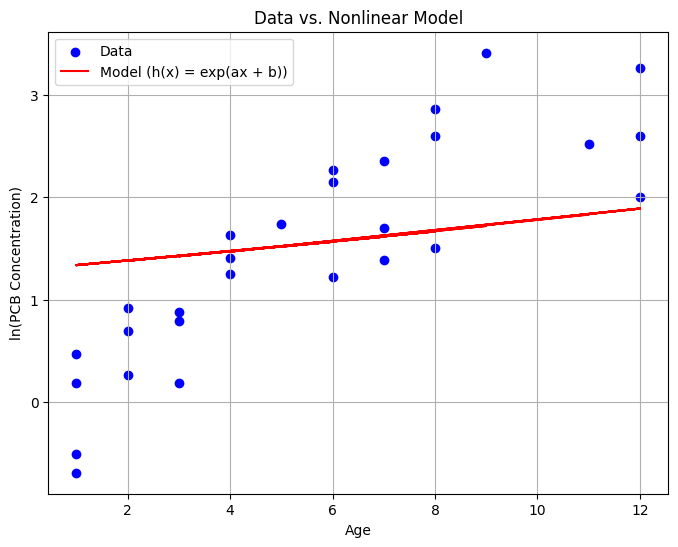

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values_transformed, label='Data', color='blue')
plt.plot(x_values, y_pred, label='Model (h(x) = exp(ax + b))', color='red')
plt.xlabel('Age')
plt.ylabel('ln(PCB Concentration)')
plt.legend()
plt.title('Data vs. Nonlinear Model')
plt.grid(True)
plt.show()

In [26]:
x1, y1 = 3, 6
x2, y2 = x1, 7

In [23]:
def squared_error_direct(a,b):
    error1 = (y1 - np.exp(a * x1 + b))**2
    error2 = (y2 - np.exp(a * x2 + b))**2
    return error1 + error2

In [24]:
def squared_error_log_scale(a,b):
    error1 = (np.log(y1) - (a * x1 + b))**2
    error2 = (np.log(y2) - (a * x2 + b))**2
    return error1 + error2

In [27]:
print(f"Non-transformed y: {squared_error_direct(a,b)}")
print(f"Transformed y: {squared_error_log_scale(a,b)}")
print(f"Are the two equal? {squared_error_direct(a,b)==squared_error_log_scale(a,b)}")

Non-transformed y: 52.02935930996284
Transformed y: 4.604083695504004
Are the two equal? False


In [12]:
def r2(y_true, y_pred):
    y_mean = np.mean(y_true)
    top = np.sum((y_true-y_pred)**2)
    bottom = np.sum((y_true-y_mean)**2)
    return 1 - (top/bottom)

In [21]:
r2_score = r2(y_values_transformed, y_pred)
r2_score

0.24308310457923243

In [14]:
x_values_transformed = np.sqrt(x_values)
x_values_transformed

array([1.        , 2.44948974, 1.        , 2.44948974, 1.        ,
       2.44948974, 1.        , 2.64575131, 1.41421356, 2.64575131,
       1.41421356, 2.64575131, 1.41421356, 2.82842712, 1.73205081,
       2.82842712, 1.73205081, 2.82842712, 1.73205081, 3.        ,
       2.        , 3.31662479, 2.        , 3.46410162, 2.        ,
       3.46410162, 2.23606798, 3.46410162])

In [15]:
y_pred_transformed_x = h(x_values_transformed, a, b)
y_pred_transformed_x

array([1.33723053, 1.39964654, 1.33723053, 1.39964654, 1.33723053,
       1.39964654, 1.33723053, 1.40831868, 1.35477723, 1.40831868,
       1.35477723, 1.40831868, 1.35477723, 1.41643879, 1.36839724,
       1.41643879, 1.36839724, 1.41643879, 1.36839724, 1.42410799,
       1.37998576, 1.43837012, 1.37998576, 1.44506178, 1.37998576,
       1.44506178, 1.39027674, 1.44506178])

In [16]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [17]:
mse_transformed_x = mean_squared_error(y_values_transformed, y_pred_transformed_x)
print(f"MSE of transformed x_valuse: {mse_transformed_x}")
mse = mean_squared_error(y_values_transformed, y_pred)
print(f"MSE of non-transformed x_values: {mse}")

MSE of transformed x_valuse: 1.0547122334846084
MSE of non-transformed x_values: 0.8412472632419894


In [18]:
r2_score_transformed_x = r2(y_values_transformed,y_pred_transformed_x)
r2_score_transformed_x

0.05101681251849777

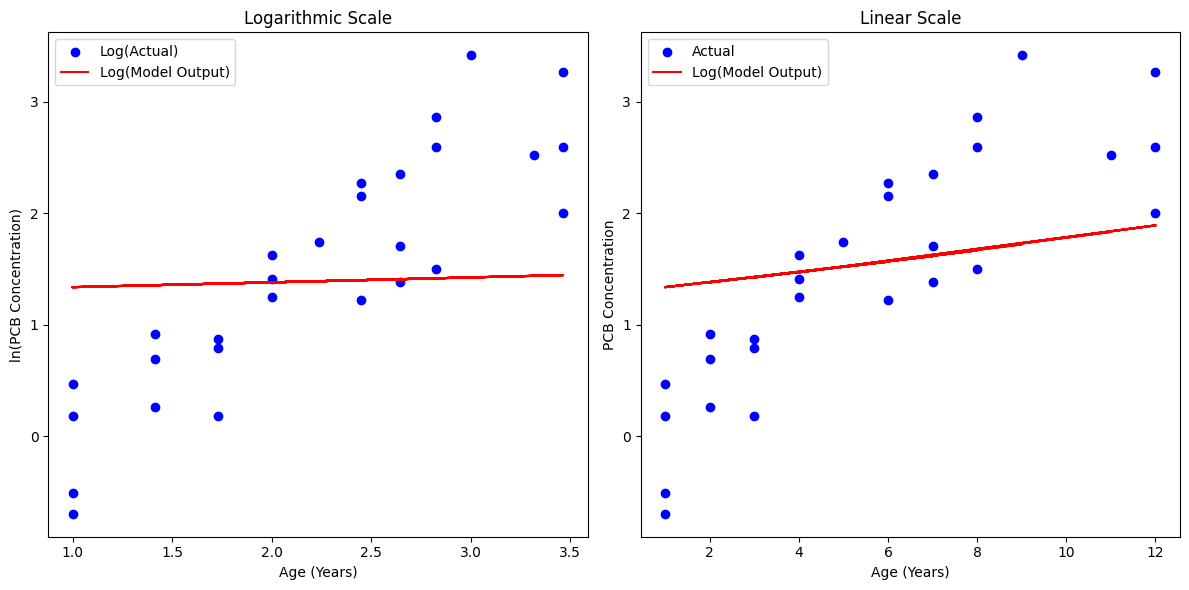

R^2 for Transformed Labels: 0.05101681251849777
R^2 for Non-transformed Labels: 0.24308310457923243


In [19]:
plt.figure(figsize=(12, 6))

#Subplot 1: Logarithmic scale
plt.subplot(1, 2, 1)
plt.scatter(x_values_transformed, y_values_transformed, label='Log(Actual)', color='blue')
plt.plot(x_values_transformed, y_pred_transformed_x, label='Log(Model Output)', color='red')
plt.xlabel('Age (Years)')
plt.ylabel('ln(PCB Concentration)')
plt.legend()
plt.title('Logarithmic Scale')

#Subplot 2: Linear scale
plt.subplot(1, 2, 2)
plt.scatter(x_values, y_values_transformed, label='Actual', color='blue')
plt.plot(x_values, y_pred, label='Log(Model Output)', color='red')
plt.xlabel('Age (Years)')
plt.ylabel('PCB Concentration')
plt.legend()
plt.title('Linear Scale')

plt.tight_layout()
plt.show()

print(f"R^2 for Transformed Labels: {r2_score_transformed_x}")
print(f"R^2 for Non-transformed Labels: {r2_score}")

In [20]:
if r2_score_transformed_x < r2_score:
    print("Model Non-transformed labels has a better fit (higher R^2).")
elif r2_score < r2_score_transformed_x:
    print("Model with tranformed labels has a better fit (higher R^2).")
else:
    print("Both models have the same fit (equal R^2).")

Model Non-transformed labels has a better fit (higher R^2).
